<a href="https://colab.research.google.com/github/YoonHyeJu/project1/blob/master/Inception_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Input, AveragePooling2D, Flatten, Concatenate
from keras import layers
import tensorflow as tf


In [3]:
model = tf.keras.Sequential()

In [39]:
input_shape = (224, 224, 3)

input_ = layers.Input(shape=input_shape)
x = Conv2D(64, kernel_size=(7,7), padding = 'same', activation='relu')(input_)
x = MaxPooling2D(padding='same')(x)

y1 = Conv2D(128, kernel_size=(5,5), strides=(1,1), padding = 'same', activation='relu')(input_)
y1 = MaxPooling2D()(y1)

y2 = Conv2D(128, kernel_size=(3,3), strides=(2,2), padding = 'same', activation='relu')(input_)

y3 = Conv2D(128, kernel_size=(7,7), strides=(1,1), padding = 'same', activation='relu')(input_)
y3 = Conv2D(128, kernel_size=(5,5), strides=(1,1), padding = 'same', activation='relu')(y3)
y3 = Conv2D(64, kernel_size=(5,5), strides=(1,1), padding = 'same', activation='relu')(y3)
y3 = MaxPooling2D()(y3)

#z = Conv2D(32, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu')(input_)
#z = AveragePooling2D()(z)

concat_ = Concatenate()([y1, y2, y3])

output_ = Flatten()(concat_)
output_ = Dense(2, activation='sigmoid')(output_)

model = Model(input_, output_)


In [36]:
y1.shape

TensorShape([None, 112, 112, 128])

In [37]:
y2.shape

TensorShape([None, 112, 112, 128])

In [38]:
y3.shape

TensorShape([None, 112, 112, 64])

In [40]:
model.summary()

Model: "functional_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_74 (Conv2D)              (None, 224, 224, 128 18944       input_12[0][0]                   
__________________________________________________________________________________________________
conv2d_75 (Conv2D)              (None, 224, 224, 128 409728      conv2d_74[0][0]                  
__________________________________________________________________________________________________
conv2d_72 (Conv2D)              (None, 224, 224, 128 9728        input_12[0][0]                   
______________________________________________________________________________________

In [43]:
from keras.utils import plot_model

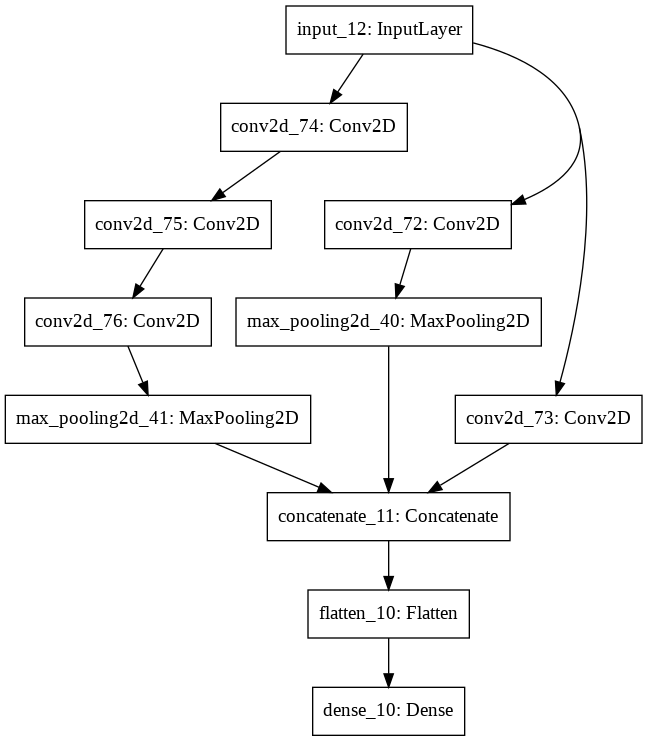

In [44]:
plot_model(model)